Text(0.5, 0, 'sepal_length (cm)')

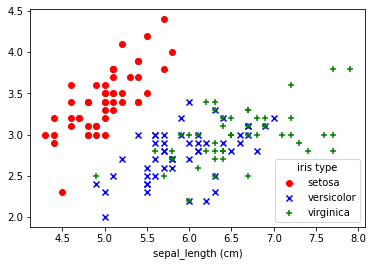

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()    # 加载鸢尾花数据

sepal_length_list = iris.data[:, 0] # 花萼长度
sepal_width_list = iris.data[:, 1] # 花萼宽度

# 构建 setosa、versicolor、virginica 索引数组
setosa_index_list = iris.target == 0 # setosa 索引数组
versicolor_index_list = iris.target == 1 # versicolor 索引数组
virginica_index_list = iris.target == 2 # virginica 索引数组

plt.scatter(sepal_length_list[setosa_index_list], 
            sepal_width_list[setosa_index_list], color="red", marker='o', label="setosa")
plt.scatter(sepal_length_list[versicolor_index_list], 
            sepal_width_list[versicolor_index_list], color="blue", marker="x", label="versicolor")
plt.scatter(sepal_length_list[virginica_index_list], 
            sepal_width_list[virginica_index_list],color="green", marker="+", label="virginica")
# 设置 legend
plt.legend(loc="best", title="iris type")
# 设定横坐标名称
plt.xlabel("sepal_length (cm)")
# 设定纵坐标名称

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


([<matplotlib.axis.YTick at 0x291d4332808>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

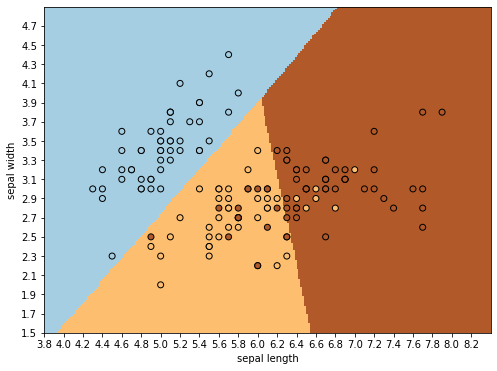

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
#将模型可视化

# 只考虑前两个特征，即花萼长度（sepal length）、花萼宽度（sepal width）
X = iris.data[:, 0:2]
y = iris.target

logreg = LogisticRegression(C=1e5)    #C：惩罚项系数的倒数，越小，正则化项越大
logreg.fit(X, y)

# 网格大小
h = 0.02

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5    # 将 X 的第一列（花萼长度）作为 x 轴，并求出 x 轴的最大值与最小值
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5    # 将 X 的第二列（花萼宽度）作为 y 轴，并求出 y 轴的最大值与最小值

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 调用 ravel() 函数将 xx 和 yy 平铺，然后使用 np.c_ 将平铺后的列表拼接
# 生成需要预测的特征矩阵，每一行的表示一个样本，每一列表示每个特征的取值
pre_data = np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(pre_data)

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

# 设置坐标轴label
plt.xlabel("sepal length")
plt.ylabel("sepal width")

# 设置坐标轴范围
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 设置坐标轴刻度
plt.xticks(np.arange(x_min, x_max, h * 10))
plt.yticks(np.arange(y_min, y_max, h * 10))